Hypos
- predicting state of a sighting
- Does religion affect sightings?

Which is more accurate?
sentiment_nltk
sentiment_textBlob
sentiment_Stanford
sentiment_VADAR

objectivity_nltk
objectivity_textBlob
objectivity_Stanford
objectivity_VADAR

Add to sightings...
sightings per capita (county)
______________________________________________________

input - sighting (impute religion and party state data)
output - state of sighting

PCA feature selection

Model Selection
- KNN
- SVM
- Naive Bayes

Tuning

Evaluate Model

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [130]:
sightings_w_counties = pd.read_pickle("sightings_with_counties.pkl")
sightings_w_features = pd.read_pickle('sightingsCapstone.pkl')

In [131]:
sightings_w_features[sightings_w_features.sentiment_nltk.isnull()|sightings_w_features.sentiment_textBlob.isnull()|sightings_w_features.objectivity_textBlob.isnull()]

,Date_Time,Shape,Duration,Summary,Posted,Detail_Link,Detail_Summary,Detail_Summary_nltk,Notes,Country,City,State,Location,Lat,Lon,timezone_str,Time_UTC,sentiment_nltk,sentiment_textBlob,objectivity_textBlob
448,2021-02-21 11:00:00,Disk,2 seconds,,3/2/21,http://www.nuforc.org/webreports/162/S162173.html,\n\n,,NaN,United States,Lakemont,GA,"Lakemont, GA United States",34.781380,-83.416510,America/New_York,2021-02-21 16:00:00+00:00,NaN,NaN,NaN
696,2021-01-25 02:30:00,Circle,20 minutes,,3/2/21,http://www.nuforc.org/webreports/161/S161763.html,\n\n,,NaN,United States,Georgetown,TX,"Georgetown, TX United States",30.638160,-97.677030,America/Chicago,2021-01-25 08:30:00+00:00,NaN,NaN,NaN
710,2021-01-22 22:05:00,Circle,5 minutes,,3/2/21,http://www.nuforc.org/webreports/161/S161745.html,\n\n,,NaN,United States,Portland,OR,"Portland, OR United States",45.511790,-122.675630,America/Los_Angeles,2021-01-23 06:05:00+00:00,NaN,NaN,NaN
833,2021-01-09 20:51:00,Formation,3 minutes,,1/19/21,http://www.nuforc.org/webreports/161/S161554.html,\n\n,,NaN,United States,Rembert,FL,"Rembert, FL United States",28.885740,-81.975232,America/New_York,2021-01-10 01:51:00+00:00,NaN,NaN,NaN
1063,2020-12-19 13:00:00,Sphere,,,12/23/20,http://www.nuforc.org/webreports/161/S161248.html,\n\n,,NaN,United States,Greenville,SC,"Greenville, SC United States",34.848290,-82.400100,America/New_York,2020-12-19 18:00:00+00:00,NaN,NaN,NaN
1238,2020-12-04 19:15:00,,5min,,12/23/20,http://www.nuforc.org/webreports/160/S160997.html,\n\n,,NaN,United States,Deweyville,UT,"Deweyville, UT United States",41.715380,-112.093630,America/Denver,2020-12-05 02:15:00+00:00,NaN,NaN,NaN
1540,2020-11-16 23:00:00,,5 minutes,,12/23/20,http://www.nuforc.org/webreports/160/S160690.html,\n\n,,NaN,United States,Portland,OR,"Portland, OR United States",45.511790,-122.675630,America/Los_Angeles,2020-11-17 07:00:00+00:00,NaN,NaN,NaN
1616,2020-11-13 17:30:00,,10 min,,12/23/20,http://www.nuforc.org/webreports/160/S160585.html,\n\n,,NaN,United States,Wyoming,DE,"Wyoming, DE United States",39.118170,-75.559690,America/New_York,2020-11-13 22:30:00+00:00,NaN,NaN,NaN
1619,2020-11-13 17:30:00,,10 min,,12/23/20,http://www.nuforc.org/webreports/160/S160583.html,\n\n,,NaN,United States,Wyoming,DE,"Wyoming, DE United States",39.118170,-75.559690,America/New_York,2020-11-13 22:30:00+00:00,NaN,NaN,NaN
1651,2020-11-11 18:00:00,,45 sec,,12/23/20,http://www.nuforc.org/webreports/160/S160751.html,\n\n,,NaN,United States,Scappoose,OR,"Scappoose, OR United States",45.757700,-122.876760,America/Los_Angeles,2020-11-12 02:00:00+00:00,NaN,NaN,NaN


In [132]:
len(sightings_w_features)

61647

In [133]:
feature_columns = ["Time_UTC", 'sentiment_nltk', 'sentiment_textBlob', 'objectivity_textBlob']

sightings = sightings_w_features.copy()

sightings_w_features = sightings_w_features[feature_columns].dropna(how="any", axis=0)

In [134]:
len(sightings_w_features)

61025

In [135]:
sightings_w_counties.columns

Index(['Date_Time', 'Shape', 'Duration', 'Summary', 'Posted', 'Detail_Link',
       'Detail_Summary', 'Detail_Summary_nltk', 'Notes', 'Country', 'City',
       'State', 'Location', 'Lat', 'Lon', 'FIPS', 'County', 'timezone_str',
       'Time_UTC'],
      dtype='object')

In [136]:
sightings.columns

Index(['Date_Time', 'Shape', 'Duration', 'Summary', 'Posted', 'Detail_Link',
       'Detail_Summary', 'Detail_Summary_nltk', 'Notes', 'Country', 'City',
       'State', 'Location', 'Lat', 'Lon', 'timezone_str', 'Time_UTC',
       'sentiment_nltk', 'sentiment_textBlob', 'objectivity_textBlob'],
      dtype='object')

In [137]:
sightings_w_features.columns

Index(['Time_UTC', 'sentiment_nltk', 'sentiment_textBlob',
       'objectivity_textBlob'],
      dtype='object')

In [138]:
len(sightings_w_counties), len(sightings_w_features), len(sightings)

(61069, 61025, 61647)

In [139]:
sightings = sightings.drop(feature_columns, axis=1).join(sightings_w_features, how="inner")
sightings = sightings.join(sightings_w_counties[['FIPS', 'County']], how="inner")
len(sightings)

61025

In [150]:
sightings.head(2)

,Date_Time,Shape,Duration,Summary,Posted,Detail_Link,Detail_Summary,Detail_Summary_nltk,Notes,Country,...,Lat,Lon,timezone_str,Time_UTC,sentiment_nltk,sentiment_textBlob,objectivity_textBlob,FIPS,County,time_num
0,2021-04-23 06:30:00,Circle,9 minutes,Very strange ((NUFORC Note: Rocket launch f...,4/23/21,http://www.nuforc.org/webreports/162/S162815.html,\nVery strangeI have recorded a video of this ...,strange recorded video fighting,NaN,United States,...,31.30443,-82.240580,America/New_York,2021-04-23 10:30:00+00:00,-0.5106,-0.05,0.150000,13229,Pierce,1619173800000000000
1,2021-04-23 06:00:00,Circle,Seconds,Ball in the sky ((NUFORC Note: Rocket launc...,4/23/21,http://www.nuforc.org/webreports/162/S162814.html,\nBall in the skyObject appears as a white bal...,ball skyobject appears white ball vapor screwi...,NaN,United States,...,37.78198,-79.974385,America/New_York,2021-04-23 10:00:00+00:00,0.3818,-0.02,0.376667,51005,Alleghany,1619172000000000000


In [151]:
sightings["time_num"] = sightings["Time_UTC"].astype(int)

In [203]:
fileName = 'sightings_merged.pkl'
sightings.to_pickle(fileName)

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

trans_cols = ["time_num"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
sightings[trans_cols] = numeric_transformer.fit_transform(sightings[trans_cols])

In [157]:
X = sightings[feature_columns]
y = sightings.State

In [159]:
X.isnull().sum()

Time_UTC                0
sentiment_nltk          0
sentiment_textBlob      0
objectivity_textBlob    0
dtype: int64

In [178]:
from sklearn.decomposition import PCA

for n in range(1, len(X.columns)+1):
    target_number_of_components = n

    pca = PCA(n_components=target_number_of_components)
    pca.fit(X)
    print(f"Total variance accounted using {n} components: {round(pca.explained_variance_ratio_.sum(),4)*100}%")

print(f"Total variance accounted using all components: {round(PCA(n_components=None).fit(X).explained_variance_ratio_.sum(),4)*100}%")

Total variance accounted using 1 components: 78.53%
Total variance accounted using 2 components: 97.95%
Total variance accounted using 3 components: 99.46000000000001%
Total variance accounted using 4 components: 100.0%
Total variance accounted using all components: 100.0%


In [179]:
n_pcs = pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,Time_UTC
1,PC1,sentiment_nltk
2,PC2,objectivity_textBlob
3,PC3,sentiment_textBlob


In [184]:
target_number_of_components = 2

pca = PCA(n_components=target_number_of_components)
pca.fit(X)
pca.explained_variance_ratio_

array([0.78528135, 0.19419871])

In [194]:
pca_features = []
for p in range(1, target_number_of_components+1):
    pca_features.append("PC" + str(p))
pca_features

pca_transformed = pca.transform(X)

X_princ = pd.DataFrame(data=pca_transformed, columns = pca_features)

,PC1,PC2
0,-1.183112,0.907873
1,-1.148056,0.005320
2,-1.127277,-0.575707
3,-1.146704,-0.124297
4,-1.174087,0.622501
...,...,...
61020,-1.172316,0.119088
61021,-1.150995,-0.401204
61022,-1.158250,-0.247634
61023,-1.177284,0.274059


In [186]:
from sklearn.cluster import KMeans

optimal_clusters = 48

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X_princ)
centroids = kmeans.cluster_centers_

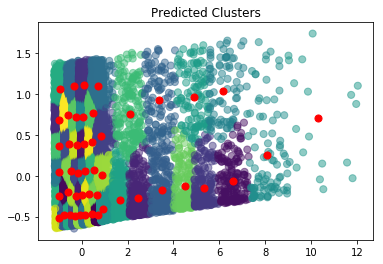

In [187]:
plt.scatter(X_princ["PC1"], X_princ["PC2"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("Predicted Clusters")
plt.show()

In [188]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_princ)
    distortions.append(kmeanModel.inertia_)

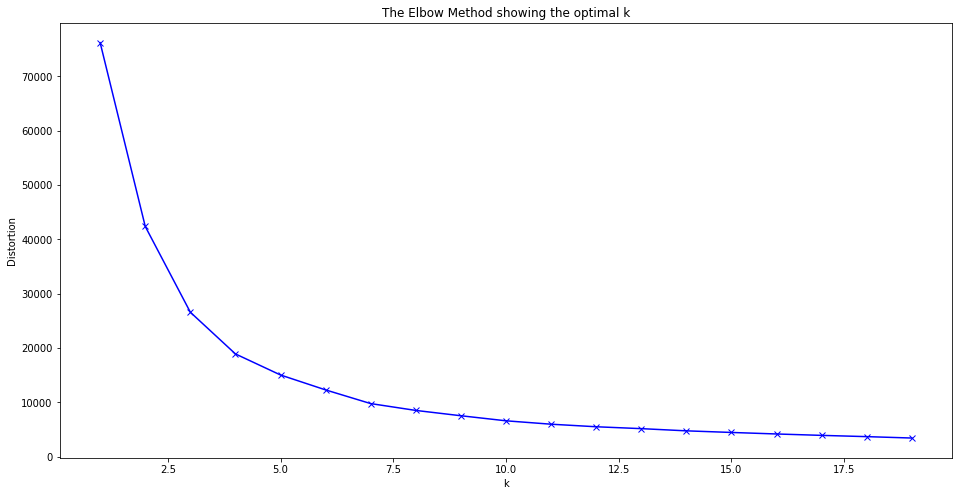

In [189]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [195]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_princ, y, test_size=.2, random_state=42)

In [198]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48820, 2), (12205, 2), (48820,), (12205,))

In [199]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve, roc_auc_score, plot_confusion_matrix, classification_report

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [200]:
svc_predict_train = svc_model.predict(X_train)
svc_predict_test = svc_model.predict(X_test)

In [201]:
sum(svc_predict_train==y_train)/len(svc_predict_train)

0.11712412945514133

In [202]:
sum(svc_predict_test==y_test)/len(svc_predict_test)

0.11667349446947972